In [1]:
import os
from dotenv import load_dotenv
from langgraph.graph import MessagesState, StateGraph
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

load_dotenv()

True

In [2]:
llm = ChatOpenAI(api_key=os.environ['OPENAI_TOKEN'])

memory = MemorySaver()

async def chat_llm(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    messages.append(AIMessage(content=response.content))

CHAT_LLM = 'chat_llm'

builder = StateGraph(MessagesState)
builder.add_node(CHAT_LLM, chat_llm)
builder.set_entry_point(CHAT_LLM)
builder.set_finish_point(CHAT_LLM)

graph = builder.compile(checkpointer=memory)

In [ ]:
import time
input = {
    'messages': [
        HumanMessage(content='What is your favorite color?')
    ]
}

config = {'configurable': {'thread_id':'1'}}

async for msg, metadata in graph.astream(input, config=config, stream_mode='messages'):
    if msg.content:
        print(msg.content, end='', flush=True)
        time.sleep(.25)

I don't have a favorite color as I am an artificial intelligence and do not have personal preferences.

In [8]:
input = {
    'messages': [
        HumanMessage(content='My name is Charles')
    ]
}

config = {'configurable': {'thread_id':'1'}}

output = graph.invoke(input, config=config)
output['messages'][-1].content

'Nice to meet you, Charles! Is there anything I can help you with today?'

In [9]:
input = {
    'messages': [
        HumanMessage(content='What is my name?')
    ]
}

output = graph.invoke(input, config=config)
output['messages'][-1].content

'Your name is Charles.'

In [10]:
output['messages']

[HumanMessage(content='My name is Charles', additional_kwargs={}, response_metadata={}, id='899b7d68-0114-4fb9-b635-33962c778530'),
 AIMessage(content='Nice to meet you, Charles! Is there anything I can help you with today?', additional_kwargs={}, response_metadata={}, id='385663ff-d4c4-484b-8b7c-81fecdac456b'),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='b0e8ad00-3d9a-46b2-9c97-0af746947e7b'),
 AIMessage(content='Your name is Charles.', additional_kwargs={}, response_metadata={})]

In [ ]:
input = {
    'messages': [
        HumanMessage(content='What is my name?')
    ]
}

config = {'configurable': {'thread_id':'2'}}

output = graph.invoke(input, config=config)
output['messages'][-1].content

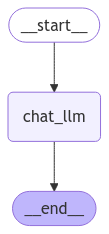

In [9]:
from IPython.display import Image, display

try: display(Image(graph.get_graph().draw_mermaid_png()))
except Exception: pass